In [1]:
#Import the required libraries.
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

2024-03-05 23:33:49.185785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 23:33:49.265119: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-05 23:33:49.287857: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 23:33:49.685297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
#Load the Resturant Reviews Data Set to a Numpy Array.
resturant_review_data = pd.read_csv("DataSet.csv")
resturant_review_data = np.array(resturant_review_data)

In [3]:
# Define the HyperParameters.
vocab_size = 10000
embedding_dim = 128
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs = 150

In [4]:
#Sepetate the Labels and the Reviews to X and y variables.
X = resturant_review_data[:,0]
y = resturant_review_data[:,1]

In [5]:
#Performing test train split with SKlearn  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#Saving the training vocabulary for later use.

# Convert NumPy arrays to Python lists
X_train_list = X_train.tolist()

# Write to JSON file
with open('Vocabulary.json', 'w') as json_file:
    json.dump(X_train_list, json_file)

In [7]:
#Using the Tensor Flow Tokenizer to generate the Word index
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [8]:
#Using the Tensor Flow Tokenizer to generate the numeric sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
#Converting the labels and sequences to Numpy Array

training_padded = np.array(training_padded).astype(np.float32)
training_labels = np.array(y_train).astype(np.float32)
testing_padded = np.array(testing_padded).astype(np.float32)
testing_labels = np.array(y_test).astype(np.float32)

In [10]:
#Creating the ANN with Embedding Layer to perform the classification

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.00004)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

2024-03-05 23:33:50.526826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-05 23:33:50.530227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-05 23:33:50.530327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-05 23:33:50.530869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [11]:
#Model Preview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                        

In [12]:
from keras.callbacks import ModelCheckpoint
# Define a file path where the best model will be saved
filepath = 'sentiment_analysis_model.h5'
# Define the ModelCheckpoint callback to monitor validation accuracy and save the best model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#Training the model for 300 epochs
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2,callbacks=[checkpoint])

Epoch 1/150

Epoch 1: val_accuracy improved from -inf to 0.48000, saving model to sentiment_analysis_model.h5


2024-03-05 23:33:51.752260: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 - 1s - loss: 0.6933 - accuracy: 0.5050 - val_loss: 0.6937 - val_accuracy: 0.4800 - 839ms/epoch - 34ms/step
Epoch 2/150

Epoch 2: val_accuracy did not improve from 0.48000
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6936 - val_accuracy: 0.4800 - 52ms/epoch - 2ms/step
Epoch 3/150

Epoch 3: val_accuracy did not improve from 0.48000
25/25 - 0s - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6936 - val_accuracy: 0.4800 - 53ms/epoch - 2ms/step
Epoch 4/150

Epoch 4: val_accuracy did not improve from 0.48000
25/25 - 0s - loss: 0.6930 - accuracy: 0.5050 - val_loss: 0.6934 - val_accuracy: 0.4800 - 58ms/epoch - 2ms/step
Epoch 5/150

Epoch 5: val_accuracy did not improve from 0.48000
25/25 - 0s - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6933 - val_accuracy: 0.4800 - 51ms/epoch - 2ms/step
Epoch 6/150

Epoch 6: val_accuracy did not improve from 0.48000
25/25 - 0s - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6934 - val_accuracy: 0.4800 - 52ms/epoch - 2ms/step
Epoch 7/150


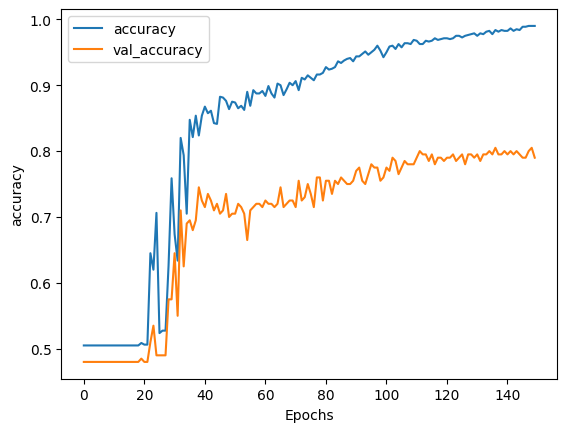

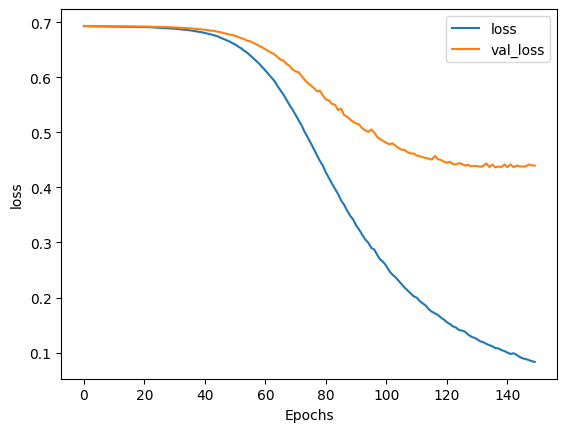

In [13]:
#Plotting the Accuracy and Loss factors
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
#Loading back the best model
model = keras.models.load_model(filepath)

In [15]:
from sklearn.metrics import accuracy_score
# Printing accuracy
X_sequences = tokenizer.texts_to_sequences(X_test)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_pred = model.predict(X_padded)
y_pred_classes = (y_pred > 0.5)
accuracy = accuracy_score(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 873us/step
Accuracy: 0.805


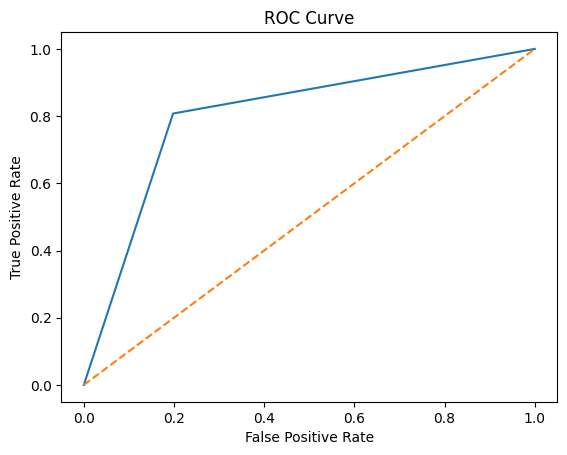

In [16]:
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

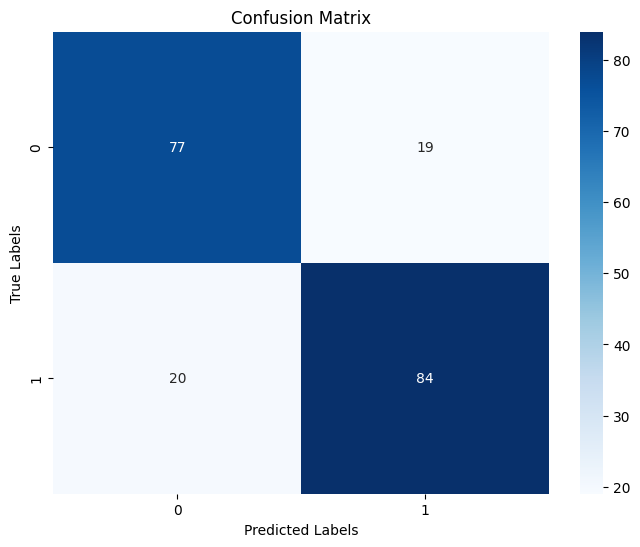

In [17]:
import seaborn as sns
# Plotting confusion matrix
cm = confusion_matrix(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate and print the classification report
print(classification_report(y_test.reshape(-1,1).astype(int), y_pred_classes.reshape(-1,1).astype(int)))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        96
           1       0.82      0.81      0.81       104

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200



In [19]:
#Testing the model on some sentences.
sentence = ["Crust is not good.", "The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.","Loved this place , found it by accident."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 12ms/step
[[0.32729524]
 [0.10775517]
 [0.9559072 ]]
